# Bayesian Neural Network

Bayesian Neural Network using Variational Inference

Ref:
* Flipout: Efficient Pseudo-Independent Weight Perturbations on Mini-Batches: https://arxiv.org/abs/1803.04386
* https://medium.com/tensorflow/regression-with-probabilistic-layers-in-tensorflow-probability-e46ff5d37baf
* https://github.com/krasserm/bayesian-machine-learning/blob/master/bayesian_neural_networks.ipynb
* https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/bayesian_neural_network.py

# Synthetic Data

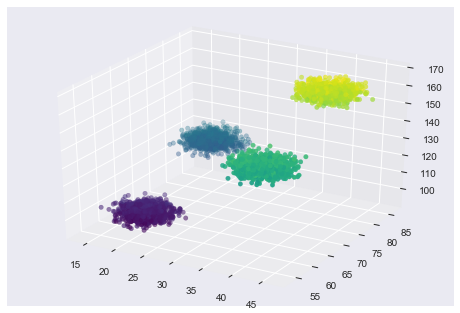

In [21]:
from data.synthetic import get_normal_data, plot_data

X, y = get_normal_data(1000, plot=True)

# Model: Bayesian Neural Network

In [20]:
from model.bayesnn import BayesNN
bayesnn = BayesNN(x_features=2,
                  y_features=1,
                  n_hidden=32,
                  n_layers=3)
bayesnn.fit(X, y, epochs=2000)

Epoch 1/2000
125/125 [==============================] - 0s 2ms/step - loss: 6268.7197
Epoch 2/2000
125/125 [==============================] - 0s 2ms/step - loss: 25.7778
Epoch 3/2000
125/125 [==============================] - 0s 2ms/step - loss: 8.7341
Epoch 4/2000
125/125 [==============================] - 0s 2ms/step - loss: 8.1470
Epoch 5/2000
125/125 [==============================] - 0s 2ms/step - loss: 8.1392
Epoch 6/2000
 60/125 [=============>................] - ETA: 0s - loss: 7.6646

KeyboardInterrupt: 

In [ ]:
y_hat = bayesnn.predict(X)
plot_data(X, y_hat)

# Ax Bayesian Optimisation

In [22]:
from model.bayesnn import BayesNN
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 2000,
}
opt_params = {
    'n_hidden': [1,100],
    'n_layers': [1,5],
}

bayesnn, best_params, best_vals, experiment, exp_model = hyperopt(
    BayesNN,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

[INFO 07-14 11:39:36] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 07-14 11:39:36] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 11:39:36] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 11:42:39] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 11:47:19] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 11:54:33] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 12:00:19] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 12:08:33] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 12:16:45] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-14 12:26:36] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-14 

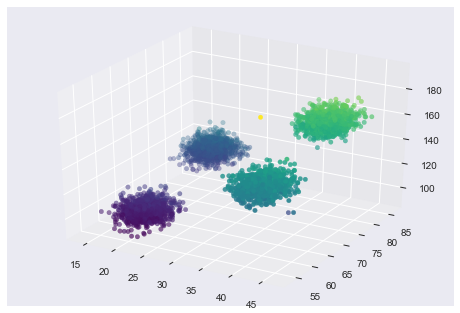

In [23]:
y_hat = bayesnn.predict(X)
plot_data(X, y_hat)

In [24]:
print(f"n_hidden: {bayesnn.n_hidden}")
print(f"n_layers: {bayesnn.n_layers}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "n_hidden", "n_layers")
performance_plot(experiment, best_vals)

n_hidden: 91
n_layers: 2


,n_hidden,n_layers,loss,fKL,rKL,JS
0,96,1,2.629792,0.086529,0.010288,0.011719
1,22,4,2.849183,0.098950,0.004335,0.012473
2,50,4,2.815907,0.149330,0.084500,0.027433
3,23,3,2.805344,0.117306,0.021987,0.016669
4,26,4,2.420856,0.057189,0.013096,0.008539
5,29,4,2.827328,0.095429,0.011104,0.012856
6,26,5,2.671062,0.074664,-0.011391,0.007727
7,26,4,2.550066,0.055279,-0.004787,0.006184
8,26,3,2.607319,0.056291,0.008951,0.007936
9,25,4,2.533362,0.046851,-0.003999,0.005256


[ERROR 07-14 14:38:41] PlotHelper: Have observations of arms with different features but same name. Arbitrary one will be plotted.


# Qualitative Validation: Visualisation

In [25]:
from visualisation.visualisation import (plot_surface,
                                         plot_prob_fixed,
                                         plot_violin,
                                         plot_prob_violin,
                                         plot_binned_violin)

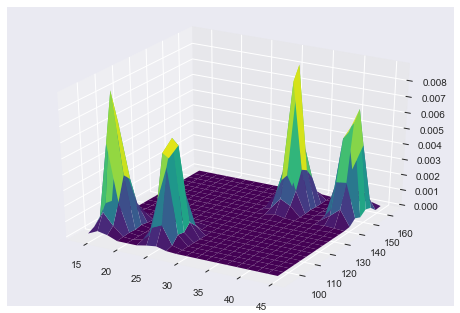

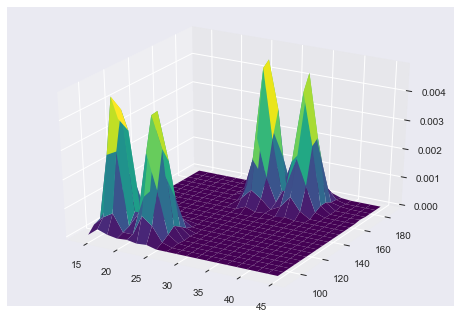

In [26]:
# Plot the density function based on X1 and X2
plot_surface(X[:,0], y[:,0], bins=20)
plot_surface(X[:,0], y_hat[:,0], bins=20)

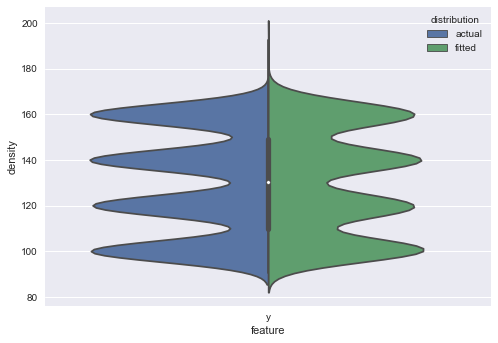

In [27]:
# Given 2 sets of data, plot a violin plot to compare the probability density function. 
plot_violin(y[:,0], y_hat[:,0], feature="y")

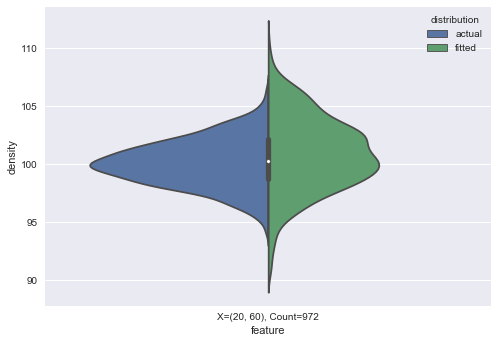

In [28]:
# Given X, plot a violin of y based on X within a tolerance, to compare the distribution between fitted and actual.
# X_tol represents the tolerance to which X data is binned to get the corresponding y.
# X_fixed represents the X fed into the model to sample y.
plot_prob_violin(bayesnn, X, y, X_fixed=(20,60), X_tol=(5,5))

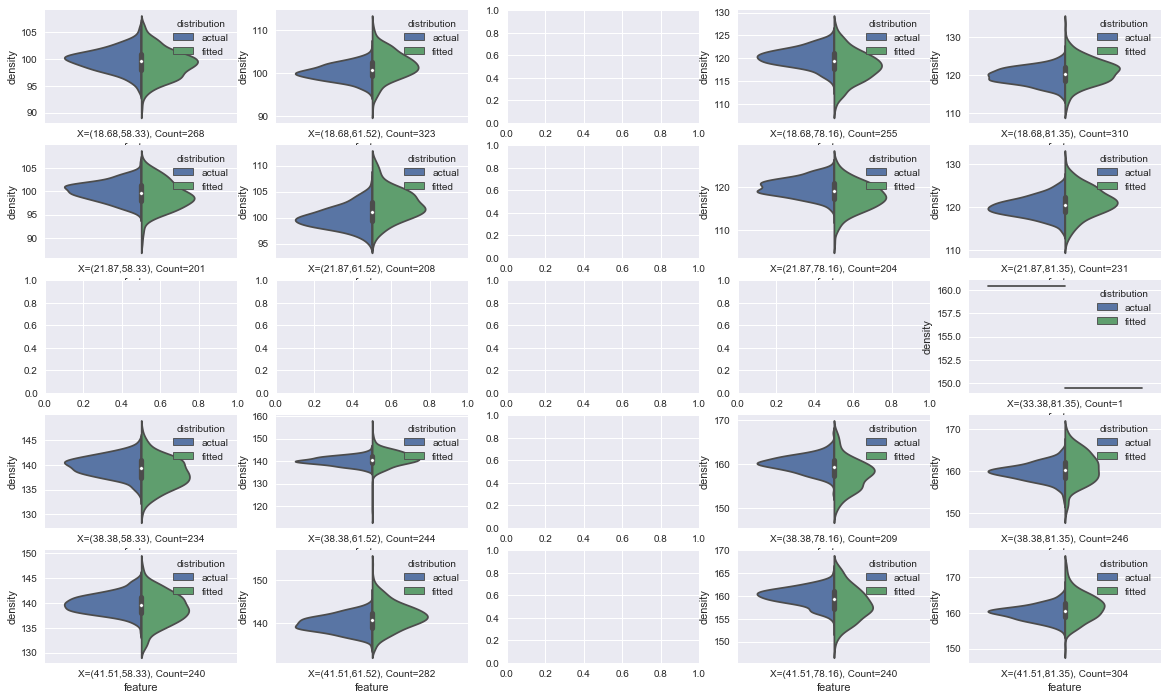

In [29]:
# Given X and y, plot a violin of y based on binned X, to compare between fitted and actual.
# For the actual distribution, bin X and plot violin plots for the density of y.
# For the fitted distribution, input the mean of binned X and plot violin plots for the density of sampled y.
plot_binned_violin(bayesnn, X, y, bins=5)

# Quantitative Validation: Metrics

In [30]:
from performance.performance import prob_overlap, kl, js

p, q = prob_overlap(y, y_hat, bins=10)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.11510481184782125
rKL: 0.18143002483680382
JS: 0.029638149786334552
